#Kaggle Instruction

In [ ]:
from IPython.display import clear_output

! pip install kaggle

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!pip install torchvision
!kaggle competitions download -c cifar-10
!unzip /content/cifar-10.zip

!sudo apt-get install p7zip-full
!7za x /content/train.7z

clear_output()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import cv2
from PIL import Image
import imageio
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torchvision as v
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torchvision

from tqdm import tqdm


In [ ]:
!cp /content/train.zip /content/drive/MyDrive/

# Data Generation


In [ ]:
Data_Labels= pd.DataFrame(columns=['First_image','Second_image','Target'])
if not os.path.isdir('/content/Cifar_Multi_Class_Reconstruction'):
    os.mkdir('/content/Cifar_Multi_Class_Reconstruction/')

In [ ]:
def dataset_generation(data_Path,destination,csv_destination):
    image_names = []
    image = []

    for i in sorted(os.listdir(data_Path)):
        image_names.append(imageio.imread(os.path.join('/content/train',i)))
        image.append(i)

    for i in tqdm(range(10)):
      for k in ((range(100*i,(100)*(i+1)))):
          for j in range(k,100*(i+1)):
            combine_image = ((image_names[k] + image_names[j])/2)
            combine_image.astype(int)
            combine_image = Image.fromarray(combine_image.astype(np.uint8))
            combine_image.save(os.path.join(destination,"{}_{}.jpg".format(image[k],image[j])))
            Data_Labels.loc[len(Data_Labels.index)] = [image[k],image[j],"{}_{}.jpg".format(image[k],image[j])] 
    Data_Labels.to_csv(csv_destination)
    return image_names 

In [ ]:
Data_Labels.to_csv('/content/Cifar_Multi_Class_Reconstruction.csv')

In [ ]:
dataset_generation('/content/train','/content/Cifar_Multi_Class_Reconstruction/','/content/Cifar_Multi_Class_Reconstruction.csv')

In [ ]:
import shutil
des = '/content/drive/MyDrive/Cifar-1000-image-combination'
# a = []
for i in os.listdir('/content/Cifar_Multi_Class_Reconstruction'):
  # a.append(os.path.join('/content/Cifar_Multi_Class_Reconstruction',i))
  shutil.copy(os.path.join('/content/Cifar_Multi_Class_Reconstruction',i), des)


In [ ]:
import shutil
shutil.make_archive('/content/Cifar-1000-image-combination', 'zip', '/content/Cifar_Multi_Class_Reconstruction/')

'/content/Cifar-1000-image-combination.zip'

In [ ]:
import os
import glob

files = glob.glob('/content/drive/MyDrive/Cifar-1000-image-combination/*')
for f in files:
    os.remove(f)

In [ ]:
import shutil
import os
# des = '/content/drive/MyDrive/Cifar-1000-image-combination'
a = []
len(os.listdir('/content/train'))

6810

In [ ]:
!unzip Cifar-1000-image-combination.zip

Archive:  Cifar-1000-image-combination.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of Cifar-1000-image-combination.zip or
        Cifar-1000-image-combination.zip.zip, and cannot find Cifar-1000-image-combination.zip.ZIP, period.


In [ ]:
ls

#Data Prepration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DataLoader


In [ ]:
!unzip '/content/drive/MyDrive/Cifar-1000-image-combination.zip' -d '/content/Cifar_Multi_Class_Reconstruction/'

In [142]:
from torch.utils.data import Dataset
from torchvision.io import read_image
import pandas as pd
import torchvision
import os

from torchvision import transforms
from torchvision import transforms, utils
from torch.utils.data import DataLoader

root_directory = '/content/'

class ImageDataLoader(Dataset):

    def __init__(self , image_directory, label_directory,transform=None):
        self.image_labels= pd.read_csv(label_directory)
        self.image_directory = image_directory
        self.transform = transform

    def __len__(self):
        return len(self.image_labels.index)

    def __getitem__(self , index):
        # print(self.image_labels.iloc[index,3])
        image_path = os.path.join(self.image_directory,str(self.image_labels.iloc[index,3]))
        image = read_image(image_path)
        image_label_1 =read_image(os.path.join('/content/train',str(self.image_labels.iloc[index,1])))
        image_label_2 =read_image(os.path.join('/content/train',str(self.image_labels.iloc[index,2])))

        # image = torch.from_numpy(image)
        # image_label_1 = torch.from_numpy(image_label_1)
        # image_label_2 = torch.from_numpy(image_label_2)b
        transform1 = transforms.Compose([transforms.ToPILImage()])
        image = transform1(image)
        image_label_1 = transform1(image_label_1)
        image_label_2 = transform1(image_label_2)

        if self.transform != None :
          image = self.transform(image)
          image_label_1 = self.transform(image_label_1)
          image_label_2 = self.transform(image_label_2)
        c = torch.cat((image_label_1, image_label_2), 1)
        return image , c
        # return image , image

In [143]:
composed = transforms.Compose([transforms.Resize(32),
  #  transforms.CenterCrop(15),
   transforms.ToTensor(),
  #  transforms.Normalize(
      #  mean=[0.485, 0.456, 0.406],
      #  std=[0.229, 0.224, 0.225]
  #  )]
])
# preprocess = T.Compose([
  #  T.Resize(256),
  #  T.CenterCrop(224),
  #  T.ToTensor(),
  #  T.Normalize(
      #  mean=[0.485, 0.456, 0.406],
      #  std=[0.229, 0.224, 0.225]
  #  )
# ])

In [144]:
train = ImageDataLoader('/content/Cifar_Multi_Class_Reconstruction','/content/Cifar_Multi_Class_Reconstruction.csv',composed)

In [145]:
train_set, val_set = torch.utils.data.random_split(train, [45000, 5500])


In [146]:

# train_dataloader = DataLoader(train, batch_size=32 ,shuffle=True)

In [147]:
train_dataloader = DataLoader(train_set, batch_size=32 ,shuffle=True)
valid_loader = DataLoader(val_set, batch_size=32 ,shuffle=True)

In [148]:
next(iter(train_dataloader))

[tensor([[[[0.3255, 0.4275, 0.3451,  ..., 0.1490, 0.1412, 0.2392],
           [0.3098, 0.3686, 0.2588,  ..., 0.2275, 0.2275, 0.2196],
           [0.2039, 0.2863, 0.2431,  ..., 0.0784, 0.1686, 0.2039],
           ...,
           [0.0000, 0.0000, 0.5176,  ..., 0.0824, 0.0196, 0.0824],
           [0.4549, 0.0000, 0.0000,  ..., 0.0275, 0.0039, 0.4863],
           [0.0000, 0.2314, 0.3137,  ..., 0.4235, 0.0549, 0.0157]],
 
          [[0.2471, 0.3490, 0.2745,  ..., 0.1451, 0.1373, 0.2353],
           [0.2353, 0.2941, 0.1961,  ..., 0.2235, 0.2235, 0.2157],
           [0.1451, 0.2314, 0.1961,  ..., 0.0784, 0.1686, 0.2039],
           ...,
           [0.0510, 0.0667, 0.5765,  ..., 0.0863, 0.0157, 0.0784],
           [0.5647, 0.0353, 0.0353,  ..., 0.0314, 0.0000, 0.4824],
           [0.0667, 0.3412, 0.3843,  ..., 0.4275, 0.0510, 0.0118]],
 
          [[0.2549, 0.3569, 0.2745,  ..., 0.1765, 0.1608, 0.2588],
           [0.2431, 0.3020, 0.2000,  ..., 0.2471, 0.2431, 0.2353],
           [0.1569, 0.23

# Model Arch

In [ ]:

class Block(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv1 = nn.Conv2d(in_ch, out_ch, 3)
        self.relu  = nn.ReLU()
        self.conv2 = nn.Conv2d(out_ch, out_ch, 3)
    
    def forward(self, x):
        return self.conv2(self.relu(self.conv1(x)))


class Encoder(nn.Module):
    def __init__(self, chs=(3,64,128,256,512,1024)):
        super().__init__()
        self.enc_blocks = nn.ModuleList([Block(chs[i], chs[i+1]) for i in range(len(chs)-1)])
        self.pool       = nn.MaxPool2d(2)
    
    def forward(self, x):
        ftrs = []
        for block in self.enc_blocks:
            x = block(x)
            ftrs.append(x)
            x = self.pool(x)
        return ftrs


class Decoder(nn.Module):
    def __init__(self, chs=(1024, 512, 256, 128, 64)):
        super().__init__()
        self.chs         = chs
        self.upconvs    = nn.ModuleList([nn.ConvTranspose2d(chs[i], chs[i+1], 2, 2) for i in range(len(chs)-1)])
        self.dec_blocks = nn.ModuleList([Block(chs[i], chs[i+1]) for i in range(len(chs)-1)]) 
        
    def forward(self, x, encoder_features):
        for i in range(len(self.chs)-1):
            x        = self.upconvs[i](x)
            enc_ftrs = self.crop(encoder_features[i], x)
            x        = torch.cat([x, enc_ftrs], dim=1)
            x        = self.dec_blocks[i](x)
        return x
    
    def crop(self, enc_ftrs, x):
        _, _, H, W = x.shape
        enc_ftrs   = torchvision.transforms.CenterCrop([H, W])(enc_ftrs)
        return enc_ftrs


class UNet(nn.Module):
    def __init__(self, enc_chs=(3,64,128,256,512,1024), dec_chs=(1024, 512, 256, 128, 64), num_class=1, retain_dim=False, out_sz=(572,572)):
        super().__init__()
        self.encoder     = Encoder(enc_chs)
        self.decoder     = Decoder(dec_chs)
        self.head        = nn.Conv2d(dec_chs[-1], num_class, 1)
        self.retain_dim  = retain_dim

    def forward(self, x):
        enc_ftrs = self.encoder(x)
        out      = self.decoder(enc_ftrs[::-1][0], enc_ftrs[::-1][1:])
        out      = self.head(out)
        if self.retain_dim:
            out = F.interpolate(out, out_sz)
        return out

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
net.to('cuda:0')

Autoencoder(
  (enc1): Linear(in_features=1024, out_features=256, bias=True)
  (enc2): Linear(in_features=256, out_features=128, bias=True)
  (enc3): Linear(in_features=128, out_features=64, bias=True)
  (enc4): Linear(in_features=64, out_features=32, bias=True)
  (enc5): Linear(in_features=32, out_features=16, bias=True)
  (dec1): Linear(in_features=16, out_features=32, bias=True)
  (dec2): Linear(in_features=32, out_features=64, bias=True)
  (dec3): Linear(in_features=64, out_features=128, bias=True)
  (dec4): Linear(in_features=128, out_features=256, bias=True)
  (dec5): Linear(in_features=256, out_features=2048, bias=True)
)

In [ ]:
from torchsummary import summary

summary(net,(3,32,32))

torch.Size([2, 3, 32, 32])


RuntimeError: ignored

#Simple MLP

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # encoder
        self.enc1 = nn.Linear(in_features=32*32, out_features=256)
        self.enc2 = nn.Linear(in_features=256, out_features=128)
        self.enc3 = nn.Linear(in_features=128, out_features=64)
        self.enc4 = nn.Linear(in_features=64, out_features=32)
        self.enc5 = nn.Linear(in_features=32, out_features=16)
        # decoder 
        self.dec1 = nn.Linear(in_features=16, out_features=32)
        self.dec2 = nn.Linear(in_features=32, out_features=64)
        self.dec3 = nn.Linear(in_features=64, out_features=128)
        self.dec4 = nn.Linear(in_features=128, out_features=256)
        self.dec5 = nn.Linear(in_features=256, out_features=32*32*2)
    def forward(self, x):
        print(x.size())
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))
        x = F.relu(self.enc3(x))
        x = F.relu(self.enc4(x))
        x = F.relu(self.enc5(x))
        x = F.relu(self.dec1(x))
        x = F.relu(self.dec2(x))
        x = F.relu(self.dec3(x))
        x = F.relu(self.dec4(x))
        x = F.relu(self.dec5(x))
        return x
net = Autoencoder()

In [ ]:
class A(nn.Module):
    def __init__(self):
        super(A, self).__init__()

        """ encoder """
        self.conv1 = nn.Conv2d(3, 32, kernel_size=(3,3))
        self.batchnorm1_e = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=(4, 4), stride=3)
        self.batchnorm2_e = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=(3, 3), stride=3)
        self.batchnorm3_e = nn.BatchNorm2d(128)

        self.maxpool2x2 = nn.MaxPool2d(2)   # not in usage

        """ decoder """
        self.upsample2x2 = nn.Upsample(scale_factor=2)   # not in usage

        self.deconv1 = nn.ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=3)
        self.batchnorm1 = nn.BatchNorm2d(64)

        self.deconv2 = nn.ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=3)
        self.batchnorm2 = nn.BatchNorm2d(32)

        self.deconv3 = nn.ConvTranspose2d(32, 6, kernel_size=(5, 5))
        self.batchnorm3 = nn.BatchNorm2d(6)
    

    def forward(self, x, train_: bool=True, print_: bool=False, return_bottlenecks: bool=False):

        """ encoder """
        x = self.conv1(x)
        # print(x.size())
        x = self.batchnorm1_e(x)
        x = F.relu(x)

        x = self.conv2(x)
        x = self.batchnorm2_e(x)
        x = F.relu(x)

        x = self.conv3(x)
        x = self.batchnorm3_e(x)
        bottlenecks = F.relu(x)

        """ decoder """
        x = self.deconv1(bottlenecks)
        x = self.batchnorm1(x)
        x = F.relu(x)

        x = self.deconv2(x)
        x = self.batchnorm2(x)
        x = F.relu(x)

        x = self.deconv3(x)
        x = torch.sigmoid(x)

        return x

In [ ]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
       
        #Encoder
        self.conv1 = nn.Conv2d(3, 1024, 3, padding=1)  
        self.conv2 = nn.Conv2d(1024, 512, 3, padding=1)
        self.conv3 = nn.Conv2d(512, 256, 3, padding=1)
        self.conv4 = nn.Conv2d(256, 128, 3, padding=1)
        self.conv5 = nn.Conv2d(128, 64, 3, padding=1)

        self.pool = nn.MaxPool2d(2, 2)
       
        #Decoder
        # self.t_conv1 = nn.ConvTranspose2d(64, 128, 2, stride=2)
        # self.t_conv2 = nn.ConvTranspose2d(128, 6, 2, stride=1)
        self.t_conv1 = nn.ConvTranspose2d(64, 128, 2)
        self.t_conv2 = nn.ConvTranspose2d(128, 256, 2, stride=2)
        self.t_conv3 = nn.ConvTranspose2d(256, 512, 2, stride=2)
        self.t_conv4 = nn.ConvTranspose2d(512, 1024, 2, stride=1)
        self.t_conv5 = nn.ConvTranspose2d(1024, 6, 2)


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = F.relu(self.conv5(x))
        x = self.pool(x)
        x = F.relu(self.t_conv1(x))
        x = F.relu(self.t_conv2(x))
        x = F.relu(self.t_conv3(x))
        x = F.relu(self.t_conv4(x))
        x = F.relu(self.t_conv5(x))
        
        return x

# More Complex Model

In [100]:
class Encoder(nn.Module):

    def __init__(self,
                 num_input_channels : int,
                 base_channel_size : int,
                 latent_dim : int,
                 act_fn : object = nn.LeakyReLU):
        super().__init__()
        c_hid = base_channel_size
        self.net = nn.Sequential(
            nn.Conv2d(num_input_channels, c_hid, kernel_size=3, padding=1, stride=2), # 32x32 => 16x16
            nn.BatchNorm2d(c_hid),
            act_fn(),
            nn.Conv2d(c_hid, c_hid, kernel_size=3, padding=1),
            nn.BatchNorm2d(c_hid),
            act_fn(),
            nn.Conv2d(c_hid, 2*c_hid, kernel_size=3, padding=1, stride=2), # 16x16 => 8x8
            nn.BatchNorm2d(2*c_hid),
            act_fn(),
            nn.Conv2d(2*c_hid, 2*c_hid, kernel_size=3, padding=1),
            nn.BatchNorm2d(2*c_hid),
            act_fn(),
            nn.Conv2d(2*c_hid, 2*c_hid, kernel_size=3, padding=1, stride=2), # 8x8 => 4x4
            nn.BatchNorm2d(2*c_hid),
            act_fn(),
            nn.Flatten(), # Image grid to single feature vector
            nn.Linear(2*16*c_hid, latent_dim),
            nn.BatchNorm1d(latent_dim),
            act_fn(),
            nn.Linear(latent_dim, 16),
            nn.BatchNorm1d(16),
            act_fn(),
            nn.Linear(16, 8),
            nn.BatchNorm1d(8),
            act_fn(),
            nn.Linear(8, 4),
            nn.BatchNorm1d(4),
            act_fn()


        )

    def forward(self, x):
        return self.net(x)


In [108]:
class Decoder(nn.Module):

    def __init__(self,
                 num_input_channels : int,
                 base_channel_size : int,
                 latent_dim : int,
                 act_fn : object = nn.LeakyReLU):
        super().__init__()
        c_hid = base_channel_size
        self.linear = nn.Sequential(
            nn.Linear(4, 8),
            nn.BatchNorm1d(8),
            act_fn(),
            nn.Linear(8, 16),
            nn.BatchNorm1d(16),
            act_fn(),
            nn.Linear(16, latent_dim),
            nn.BatchNorm1d(latent_dim),
            act_fn(),
            nn.Linear(latent_dim, 2*16*c_hid),
            nn.BatchNorm1d(2*16*c_hid),
            act_fn()
        )
        self.net = nn.Sequential(
            nn.ConvTranspose2d(2*c_hid, 2*c_hid, kernel_size=3, output_padding=1, padding=1, stride=2), # 4x4 => 8x8
            nn.BatchNorm2d(2*c_hid),
            act_fn(),
            nn.Conv2d(2*c_hid, 2*c_hid, kernel_size=3, padding=1),
            nn.BatchNorm2d(2*c_hid),
            act_fn(),
            nn.ConvTranspose2d(2*c_hid, c_hid, kernel_size=3, output_padding=1, padding=1, stride=2), # 8x8 => 16x16
            nn.BatchNorm2d(c_hid),
            act_fn(),
            nn.Conv2d(c_hid, c_hid, kernel_size=3, padding=1),
            nn.BatchNorm2d(c_hid),
            act_fn(),
            nn.ConvTranspose2d(c_hid, num_input_channels*2, kernel_size=3, output_padding=1, padding=1, stride=2), # 16x16 => 32x32
            nn.Sigmoid() # The input images is scaled between -1 and 1, hence the output has to be bounded as well
        )

    def forward(self, x):
        x = self.linear(x)
        x = x.reshape(x.shape[0], -1, 4, 4)
        x = self.net(x)
        return x


In [109]:
encoder = Encoder(3, 32, 64)

In [110]:
class Autoencoder(nn.Module):

    def __init__(self,
                 base_channel_size: int,
                 latent_dim: int,
                 encoder_class : object = Encoder,
                 decoder_class : object = Decoder,
                 num_input_channels: int = 3,
                 width: int = 32,
                 height: int = 32):
        super().__init__()
        self.encoder = encoder_class
        self.decoder = decoder_class(num_input_channels, base_channel_size, latent_dim)
        self.example_input_array = torch.zeros(2, num_input_channels, width, height)

    def forward(self, x):
        """
        The forward function takes in an image and returns the reconstructed image
        """
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision      
import matplotlib.pyplot as plt
import numpy as np


class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        
        self.encoder = nn.Sequential(
            nn.Conv2d(
                in_channels=3,      
                out_channels=16,    
                kernel_size=3,      
                stride=1,          
                padding=1,      
            ),      
            nn.LeakyReLU(),    
            nn.Conv2d(
                in_channels=16,     
                out_channels=32,    
                kernel_size=3,      
                stride=1,          
                padding=1,      
            ),     
            nn.LeakyReLU(),    
            nn.MaxPool2d(kernel_size=2),     
            nn.Conv2d(
                in_channels=32,     
                out_channels=32,    
                kernel_size=5,      
                stride=1,          
                padding=2,      
            ),      
            nn.LeakyReLU(),    
            nn.Conv2d(
                in_channels=32,     
                out_channels=64,    
                kernel_size=5,      
                stride=1,          
                padding=2,      
            ),      
            nn.LeakyReLU(),    
            nn.MaxPool2d(kernel_size=2),    
        )
        
        self.decoder = nn.Sequential(
                nn.ConvTranspose2d(
                in_channels=64,     
                out_channels=32,    
                kernel_size=2,      
                stride=2,          
                padding=0,      
            ),     
            nn.LeakyReLU(),        
            nn.Conv2d(
                in_channels=32,     
                out_channels=32,    
                kernel_size=5,      
                stride=1,          
                padding=2,      
            ),      
            nn.LeakyReLU(),    
           nn.ConvTranspose2d(
                in_channels=32,     
                out_channels=16,    
                kernel_size=5,      
                stride=1,          
                padding=2,      
            ),
            nn.Conv2d(
                in_channels=16,     
                out_channels=16,    
                kernel_size=5,      
                stride=1,          
                padding=2,     
            ),      
            nn.LeakyReLU(),           
             nn.ConvTranspose2d(
                in_channels=16,     
                out_channels=16,    
                kernel_size=2,      
                stride=2,          
                padding=0,      
            ), 
            nn.LeakyReLU(),
            nn.Conv2d(
                in_channels=16,     
                out_channels=16,    
                kernel_size=3,      
                stride=1,          
                padding=1,      
            ),     
            nn.LeakyReLU(),                
           nn.ConvTranspose2d(
                in_channels=16,     
                out_channels=3,    
                kernel_size=5,      
                stride=1,          
                padding=2,      
            ),
            nn.Conv2d(
                in_channels=3,     
                out_channels=6,    
                kernel_size=3,      
                stride=1,          
                padding=1,      
            ),    
            nn.ReLU(),  
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [111]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net =  Autoencoder(base_channel_size=32, latent_dim=64, encoder_class=encoder)
optimizer = optim.Adam(net.parameters(), lr=0.1, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
net.to('cuda:0')
criterion = nn.MSELoss()


In [106]:
loss_hist, acc_hist = [], []
loss_hist_val, acc_hist_val = [], []

for epoch in range(140):
    net.train()

    running_loss = 0.0
    correct = 0
    for data in train_dataloader:
        batch, labels = data
        batch = batch.float()
        # labels[0] = torch.tensor(labels[0]).to('cuda:0')
        # labels[1] = torch.tensor(labels[1]).to('cuda:0')

        batch , labels = batch.to('cuda:0') , labels.to('cuda:0')
        batch, labels = batch.cuda(), labels.cuda() # add this line

        optimizer.zero_grad()
        # optimizer2.zero_grad()

        # outputs = net(batch)
        output1 = outputs[:,3:,:,:]
        output2 = outputs[:,:3,:,:]
        # # print(outputs.size())

        loss1 = criterion(output1, labels[:,:,32:,:].float())
        loss2 = criterion(output2, labels[:,:,:32,:].float())
        loss = loss1 + loss2

        # outputs1 = net(batch)
        # loss1 = criterion(outputs1, labels[:,:,32:,:].float())
        # plt.imshow()
        # loss = criterion(outputs1, labels.float())

        loss.backward()

        # outputs2 = net2(batch)
        # loss2 = criterion(outputs1, labels[:,:,32:,:].float())
        # loss2 = criterion(outputs1, labels.float())

        # loss2.backward(retain_graph=True)

        optimizer.step()
        # optimizer2.step()

        # compute training statistics
        # _, predicted = torch.max(outputs, 1)
        # print(loss)

        # correct += (predicted == labels).sum().item()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_set)
    loss_hist.append(avg_loss)

    # validation statistics
    net.eval()
    loss_val = 0.0
    correct_val = 0
    for data in valid_loader:
      batch, labels = data
        batch = batch.float()
        batch , labels = batch.to('cuda:0') , labels.to('cuda:0')
        batch, labels = batch.cuda(), labels.cuda() # add this line
        optimizer.zero_grad()

        output1 = outputs[:,3:,:,:]
        output2 = outputs[:,:3,:,:]

        loss1 = criterion(output1, labels[:,:,32:,:].float())
        loss2 = criterion(output2, labels[:,:,:32,:].float())
        loss = loss1 + loss2

        loss = criterion(outputs1, labels.float())
        loss_val += loss.item()
    avg_loss_val = loss_val / len(val_set)
    loss_hist_val.append(avg_loss_val)
  net.train()
  print('[epoch %d] loss: %.5f accuracy: %.4f val loss: %.5f val accuracy: %.4f' % (epoch + 1, avg_loss, avg_loss_val))


IndentationError: ignored

In [112]:
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True, min_lr=0)

loss_hist, acc_hist = [], []
loss_hist_val, acc_hist_val = [], []

for epoch in range(10):
  running_loss = 0.0
  correct = 0
  for data in train_dataloader:
    batch, labels = data
    batch = batch.float()
    batch, labels = batch.to(device), labels.to(device)

    optimizer.zero_grad()
    outputs = net(batch)
    # loss = criterion(outputs, labels)

    output1 = outputs[:,3:,:,:]
    output2 = outputs[:,:3,:,:]
    # # print(outputs.size())

    loss1 = criterion(output1, labels[:,:,32:,:].float())
    loss2 = criterion(output2, labels[:,:,:32,:].float())
    loss = loss1 + loss2

    loss.backward()
    optimizer.step()

    # compute training statistics
    # _, predicted = torch.max(outputs, 1)
    # correct += (predicted == labels).sum().item()
    running_loss += loss.item()

  avg_loss = running_loss / len(train_set)
  # avg_acc = correct /len(train_set)
  loss_hist.append(avg_loss)
  # acc_hist.append(avg_acc)

  # validation statistics
  net.eval()
  with torch.no_grad():
    loss_val = 0.0
    correct_val = 0
    for data in valid_loader:
      batch, labels = data
      batch = batch.float()
      batch, labels = batch.to(device), labels.to(device)
      outputs = net(batch)
      # loss = criterion(outputs, labels)

      output1 = outputs[:,3:,:,:]
      output2 = outputs[:,:3,:,:]
      # # print(outputs.size())

      loss1 = criterion(output1, labels[:,:,32:,:].float())
      loss2 = criterion(output2, labels[:,:,:32,:].float())
      loss = loss1 + loss2
      # loss = criterion(outputs, labels)
      # _, predicted = torch.max(outputs, 1)
      # correct_val += (predicted == labels).sum().item()
      loss_val += loss.item()
    avg_loss_val = loss_val / len(val_set)
    # avg_acc_val = correct_val / len(val_set)
    loss_hist_val.append(avg_loss_val)
    # acc_hist_val.append(avg_acc_val)
  net.train()

  scheduler.step(avg_loss_val)
  print('[epoch %d] loss: %.5f val loss: %.5f' % (epoch + 1, avg_loss, avg_loss_val))

[epoch 1] loss: 0.00380 val loss: 0.00360
[epoch 2] loss: 0.00353 val loss: 0.00354
[epoch 3] loss: 0.00346 val loss: 0.00343
[epoch 4] loss: 0.00344 val loss: 0.00350
[epoch 5] loss: 0.00344 val loss: 0.00352
[epoch 6] loss: 0.00342 val loss: 0.00342
[epoch 7] loss: 0.00341 val loss: 0.00339
[epoch 8] loss: 0.00340 val loss: 0.00337
[epoch 9] loss: 0.00340 val loss: 0.00350
[epoch 10] loss: 0.00340 val loss: 0.00343


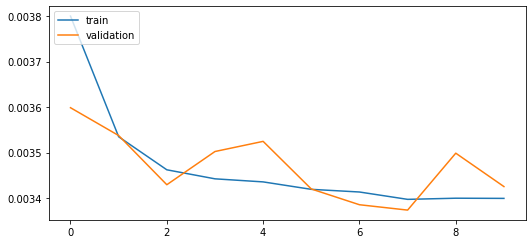

In [113]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
line1, = plt.plot(loss_hist,label="train")
line2, = plt.plot(loss_hist_val,label="validation")
leg = plt.legend(loc='upper left')
plt.show()

In [ ]:
net.eval()

In [ ]:
data = []
j = 0 
net.eval()
with torch.no_grad():
    for data in train_dataloader:
        batch, labels = data
        batch, labels = batch.to(device), labels.to(device)
        out = net(batch)
        # plt.hist(out[1,3:,0,0].cpu().detach().numpy()*255)
        plt.imshow(((out[1,3:,:,:].cpu().detach().numpy()*255).T).astype(int))
        plt.show()
        j = j +1 
        if(j>20):
          break
        print(j)

In [ ]:
out[0,3:,:,:].cpu().detach().numpy()

In [64]:
data[0][0].size()

torch.Size([3, 32, 32])

In [65]:
net(data[0][0])

RuntimeError: ignored

In [48]:
loss_hist

[0.01829134351015091,
 0.01829119467602836,
 0.018291674719254174,
 0.018288753596279357,
 0.018291366510921055,
 0.018289796302053664,
 0.018290697213013966,
 0.018292148091395698]

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net1 =  Autoencoder(base_channel_size=32, latent_dim=64, encoder_class=encoder)
net2 = Autoencoder(base_channel_size=32, latent_dim=64 , encoder_class=encoder)
criterion = nn.MSELoss()
optimizer1 = optim.Adam(net1.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
optimizer2 = optim.Adam(net2.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

net1.to('cuda:0')
net2.to('cuda:0')


In [ ]:
from torchsummary import summary

summary(net1,(3,32,32))

# Train 

torch.Size([32, 3, 32, 32])


TypeError: ignored

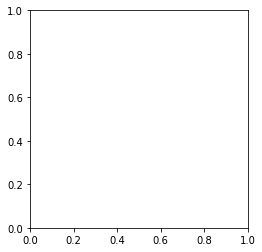

In [ ]:
for epoch in range(140):
    net1.train()
    net2.train()

    running_loss = 0.0
    correct = 0
    for data in train_dataloader:
        batch, labels = data
        batch = batch.float()
        # labels[0] = torch.tensor(labels[0]).to('cuda:0')
        # labels[1] = torch.tensor(labels[1]).to('cuda:0')

        batch , labels = batch.to('cuda:0') , labels.to('cuda:0')
        batch, labels = batch.cuda(), labels.cuda() # add this line

        optimizer1.zero_grad()
        # optimizer2.zero_grad()

        # outputs = net(batch)
        # output1 = outputs[:,3:,:,:]
        # output2 = outputs[:,:3,:,:]
        # # print(outputs.size())

        # loss1 = criterion(output1, labels[:,:,32:,:].float())
        # loss2 = criterion(output2, labels[:,:,:32,:].float())
        # loss = loss1 + loss2

        outputs1 = net1(batch)
        # loss1 = criterion(outputs1, labels[:,:,32:,:].float())
        plt.imshow()
        loss1 = criterion(outputs1, labels.float())

        loss1.backward(retain_graph=True)

        # outputs2 = net2(batch)
        # loss2 = criterion(outputs1, labels[:,:,32:,:].float())
        # loss2 = criterion(outputs1, labels.float())

        # loss2.backward(retain_graph=True)

        optimizer1.step()
        # optimizer2.step()

        # compute training statistics
        # _, predicted = torch.max(outputs, 1)
        # print(loss)

        # correct += (predicted == labels).sum().item()
        running_loss += loss1.item()
    print(running_loss)